## 1.辅助函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(W1, W2):
    return (1 / 4) * W1 ** 2 + W2 ** 2


def f_grad(W1, W2, descent=True):
    grad = np.array([0.5 * W1, 2 * W2])
    if descent:
        grad *= -1
    learning_rate = 0.2
    return learning_rate * grad


## 2.可视化

P0:[-4.5  4.5]
P1:[-4.05  2.7 ]
P2:[-3.645  1.62 ]
P3:[-3.2805  0.972 ]
P4:[-2.95245  0.5832 ]
P5:[-2.657205  0.34992 ]
P6:[-2.3914845  0.209952 ]
P7:[-2.15233605  0.1259712 ]
P8:[-1.93710244  0.07558272]
P9:[-1.7433922   0.04534963]
P10:[-1.56905298  0.02720978]
P11:[-1.41214768  0.01632587]
P12:[-1.27093291  0.00979552]
P13:[-1.14383962  0.00587731]
P14:[-1.02945566  0.00352639]
P15:[-0.92651009  0.00211583]
P16:[-0.83385908  0.0012695 ]
P17:[-0.75047318  0.0007617 ]
P18:[-6.75425859e-01  4.57019805e-04]
P19:[-6.07883273e-01  2.74211883e-04]
P20:[-5.47094946e-01  1.64527130e-04]
P21:[-4.92385451e-01  9.87162779e-05]
P22:[-4.43146906e-01  5.92297667e-05]
P23:[-3.98832215e-01  3.55378600e-05]
P24:[-3.58948994e-01  2.13227160e-05]
P25:[-3.23054094e-01  1.27936296e-05]
P26:[-2.90748685e-01  7.67617777e-06]
P27:[-2.61673817e-01  4.60570666e-06]


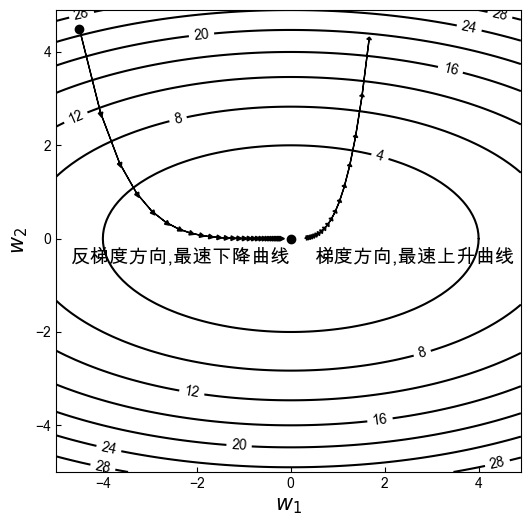

In [2]:

def plot_countour():
    W1 = np.arange(-5, 5, 0.1)
    W2 = np.arange(-5, 5, 0.1)
    W1, W2 = np.meshgrid(W1, W2)
    J = f(W1, W2)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    fig, ax = plt.subplots(figsize=(6, 6))
    CS = ax.contour(W1, W2, J, 9, colors='black')
    ax.scatter(0, 0, c='black')
    p = np.array([-4.5, 4.5])  # 起始位置
    ax.scatter(p[0], p[1], c='black')
    for i in range(28):  # 梯度反方向，最速下降曲线
        q = f_grad(p[0], p[1])
        print("P{}:{}".format(i, p))
        ax.arrow(p[0], p[1], q[0], q[1], head_width=0.1, head_length=0.1, fc='black', ec='black')
        p += q  # 上一次的位置加上本次的梯度
    plt.annotate("反梯度方向,最速下降曲线", xy=(-4.7, -0.5), fontsize=14, c='black')

    p = np.array([0.3, 0.01])  # 起始位置
    for i in range(18):  # 梯度方向，最速上升曲线
        q = f_grad(p[0], p[1], descent=False)
        ax.arrow(p[0], p[1], q[0], q[1], head_width=0.1, head_length=0.05, fc='black', ec='black')
        p += q  # 上一次的位置加上本次的梯度
    plt.annotate("梯度方向,最速上升曲线", xy=(0.5, -0.5), fontsize=14, c='black')
    ax.clabel(CS, inline=2, fontsize=10)
    ax.set_xlabel(r'$w_1$', fontsize=15)
    ax.set_ylabel(r'$w_2$', fontsize=15)
    # plt.rcParams['font.sans-serif'] = ['SimSun']  # 用来  正常显示中文标签
    plt.show()


if __name__ == '__main__':
    plot_countour()